# Note
1. Melakukan percobaan build_models v4.0
2. Dilakukan pada hari Kamis, 27 Juni 2024
3. Tempat di Kost
4. Meliputi Class: 20 Kelas Aksara Jawa:
- Ba, Ca, Da, Dha, Ga, Ha, Ja, Ka, La, Ma, 
- Na, Nga, Nya, Pa, Ra, Sa, Ta, Tha, Wa, Ya

# Setup Environment 

In [1]:
# pip install tensorflow

In [2]:
# pip install keras

In [3]:
# pip install opencv-python

In [4]:
# pip install imutils

In [5]:
# pip install matplotlib

In [6]:
# pip install seaborn

In [7]:
# pip install scikit-learn

# Import Library

In [8]:
import pandas as pd
import matplotlib.pyplot as plt  
import os
from os.path import join
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization , Activation,Conv2D
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score,roc_curve,confusion_matrix 

# Preprocessing

In [9]:
import os
import pandas as pd

def create_labels_csv(DATASET_PATH, OUTPUT_CSV):
    # List to store image file paths and their corresponding labels
    data = []

    # Traverse the dataset directory
    for root, dirs, files in os.walk(DATASET_PATH):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):
                # Get the class label from the subdirectory name
                label = os.path.basename(root)
                # Get the full file path
                file_path = os.path.join(root, file)
                # Append to the data list
                data.append([file_path, label])
    
    # Create a DataFrame from the data list
    df = pd.DataFrame(data, columns=['file_path', 'label'])
    
    # Save the DataFrame to a CSV file
    df.to_csv(OUTPUT_CSV, index=False)
    print(f'Labels CSV file created at: {OUTPUT_CSV}')

# Usage

DATASET_PATH = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\"
OUTPUT_CSV = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\labels.csv"

create_labels_csv(DATASET_PATH, OUTPUT_CSV)

Labels CSV file created at: C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.7\labels.csv


In [10]:
import pandas as pd

path_main = DATASET_PATH
file = path_main + "labels.csv"
df = pd.read_csv(file)
df.head()

,file_path,label
0,C:\Users\wawn1\projects_skripsi\data\data_prep...,ba
1,C:\Users\wawn1\projects_skripsi\data\data_prep...,ba
2,C:\Users\wawn1\projects_skripsi\data\data_prep...,ba
3,C:\Users\wawn1\projects_skripsi\data\data_prep...,ba
4,C:\Users\wawn1\projects_skripsi\data\data_prep...,ba


Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.7\ba is  138
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.7\ca is  132
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.7\da is  132
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.7\dha is  132
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.7\ga is  132
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.7\ha is  126
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.7\ja is  132
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.7\ka is  132
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.7\la is  132
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.7\ma is  132
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.7\na is  132
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.7\ng

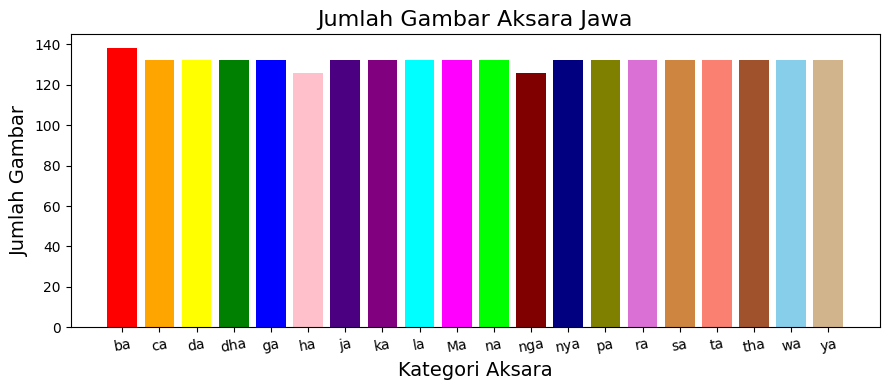

In [11]:
import matplotlib.pyplot as plt
import os
# Define an empty list
file_counts = []
def countFile(link):
    path = link
    num_files = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
    file_counts.append(num_files)
    print(f"Jumlah File {link} is ", num_files)
    
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\ba")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\ca")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\da")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\dha")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\ga")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\ha")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\ja")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\ka")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\la")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\ma")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\na")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\nga")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\nya")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\pa")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\ra")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\sa")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\ta")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\tha")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\wa")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.7\\ya")

# Define the input path aksara
aksara_categories = ['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'Ma', 'na',
                     'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'pink', 'indigo', 'purple', 
          'cyan', 'magenta', 'lime', 'maroon', 'navy', 'olive', 'orchid', 'peru', 
          'salmon', 'sienna', 'skyblue', 'tan']  # Colors for each bar

# Create bar chart
plt.figure(figsize=(9, 4))
plt.bar(aksara_categories, file_counts, color=colors)
plt.xlabel('Kategori Aksara', fontsize=14)
plt.ylabel('Jumlah Gambar', fontsize=14)
plt.title('Jumlah Gambar Aksara Jawa', fontsize=16)
plt.xticks(fontsize=10, rotation=10)
plt.tight_layout()

# Show the plot
plt.show()


In [12]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Define the input path and aksaraJowo
INPUT_PATH = path_main  
AKSARA = aksara_categories

# Define the target image size
IMAGE_SIZE = (94, 94)
INPUT_SHAPE = (94, 94, 1)

def create_image_generator(input_path, aksaraJowo, image_size):
    for index, jowo in enumerate(aksaraJowo):
        aksara_path = os.path.join(input_path, jowo)
        
        for filename in os.listdir(aksara_path):
            image_path = os.path.join(aksara_path, filename)
            original_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)  # Baca dan ubah warna asli
            original_image_resized = cv2.resize(original_image, image_size, interpolation=cv2.INTER_AREA)  # Resize gambar asli
            grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Baca gambar sebagai grayscale
            grayscale_image_resized = cv2.resize(grayscale_image, image_size, interpolation=cv2.INTER_AREA)  # Resize gambar grayscale
            image_filtered = apply_custom_preprocessing(grayscale_image_resized)
            
            yield original_image_resized, grayscale_image_resized, image_filtered, index


def load_images(input_path, aksaraJowo, image_size):
    X_original, X_grayscale, X_filtered, y_label = [], [], [], []
    
    for original_image, grayscale_image, image_filtered, label in create_image_generator(input_path, aksaraJowo, image_size):
        X_original.append(original_image)
        X_grayscale.append(grayscale_image)
        X_filtered.append(image_filtered)
        y_label.append(label)
        
    X_original = np.array(X_original)
    X_grayscale = np.array(X_grayscale)
    X_filtered = np.array(X_filtered)
    y_label = to_categorical(np.array(y_label))
    
    return X_original, X_grayscale, X_filtered, y_label

def apply_custom_preprocessing(image):
    # Apply Gaussian Blur
    ApplyGaussian = cv2.GaussianBlur(image, (9, 9), 10.0)
    # Enhance the image sharpness
    img = cv2.addWeighted(image, 1.5, ApplyGaussian, -0.5, 0, image)
    # Apply sharpening filter
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    img = cv2.filter2D(img, -1, kernel)
    # Remove noise using median filter
    img = cv2.medianBlur(img, 1)
    # Apply Otsu's thresholding
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Invert the image (background to black, text to white)
    img = 255 - img
    
    return img

# Load images with custom preprocessing applied
X_original, X_grayscale, X_filtered, y_label = load_images(INPUT_PATH, AKSARA, IMAGE_SIZE)

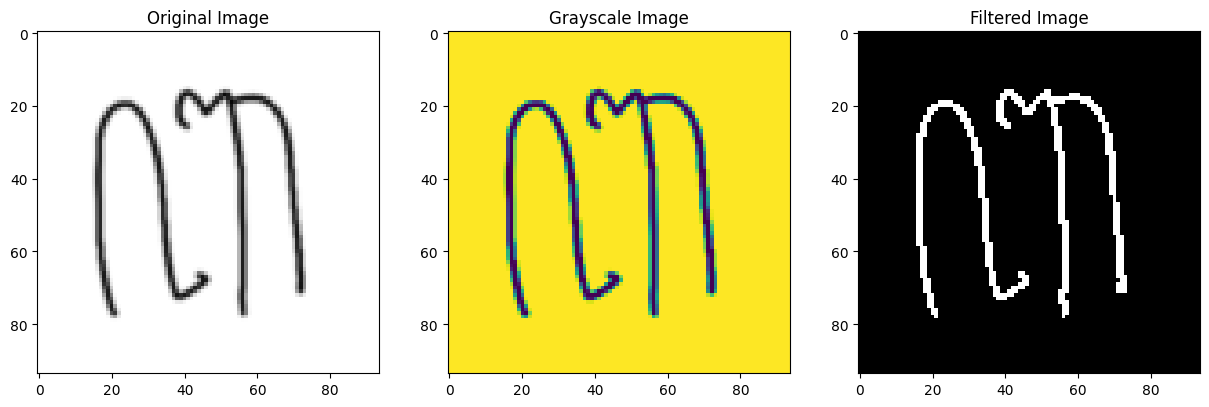

In [13]:
# Select one image to display
index_to_display = 0

# Display the original image, grayscale image, and filtered image
original_image = X_original[index_to_display]
grayscale_image = X_grayscale[index_to_display]
filtered_image = X_filtered[index_to_display]

# Plot the images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(original_image)
plt.axis('on')

plt.subplot(1, 3, 2)
plt.title('Grayscale Image')
plt.imshow(grayscale_image)
plt.axis('on')

plt.subplot(1, 3, 3)
plt.title('Filtered Image')
# plt.imshow(filtered_image, cmap='gray')
plt.imshow(filtered_image, cmap='gray')
plt.axis('on')

plt.show()

In [14]:
print(f"Bentuk input pada gambar: {IMAGE_SIZE}")


Bentuk input pada gambar: (94, 94)


In [15]:
# Reshape X_filtered
X_filtered_reshaped = X_filtered.reshape(-1, 94, 94, 1)
print("X_filtered shape after reshape:", X_filtered_reshaped.shape)

X_filtered shape after reshape: (2634, 94, 94, 1)


In [16]:
# Train test split 
from sklearn.model_selection import train_test_split

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_label, test_size=0.3, random_state=45)

In [17]:
print("x_train shape", X_train.shape)
print("x_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

x_train shape (1843, 94, 94)
x_test shape (791, 94, 94)
y_train shape (1843, 20)
y_test shape (791, 20)


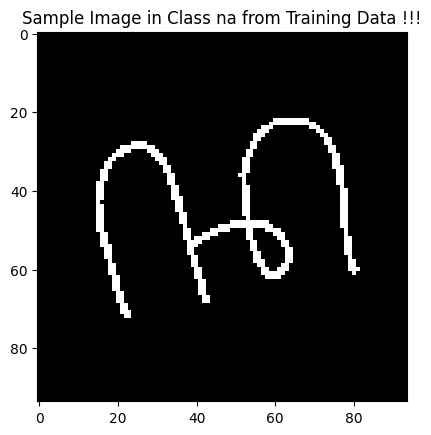

In [18]:
# Menampilkan salah satu gambar dari data pelatihan
plt.imshow(X_train[0], cmap='gray')
plt.title("Sample Image in Class {} from Training Data !!!".format(AKSARA[np.argmax(y_train[0])]))
plt.axis('on')
plt.show()

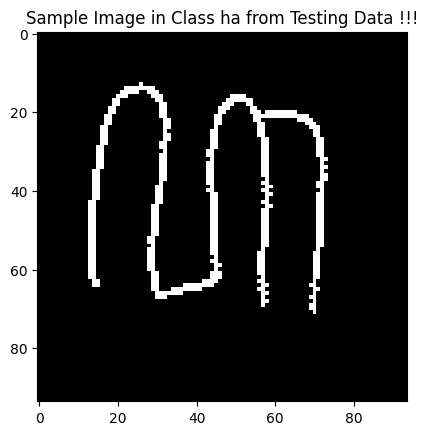

In [19]:
# Menampilkan salah satu gambar dari data pelatihan
plt.imshow(X_test[0], cmap='gray')
plt.title("Sample Image in Class {} from Testing Data !!!".format(AKSARA[np.argmax(y_test[0])]))
plt.axis('on')
plt.show()

# Build the Model

## Model 1

In [20]:
# import tensorflow as tf
# from tensorflow.keras.utils import plot_model

# from tensorflow.keras.applications import VGG16

# vgg16 = tf.keras.applications.VGG16(
#     input_shape=(128, 128, 3),
#     pooling=max,
#     include_top=False,
#     weights="imagenet")
# vgg16.summary()

In [21]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import layers, initializers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

# Initialize Sequential model
model = Sequential()

# Add VGG16 as a layer
# model.add(vgg16)

# model = models.Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=INPUT_SHAPE))
BatchNormalization()
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
BatchNormalization()
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 2
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
BatchNormalization()
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
BatchNormalization()
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 3
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
BatchNormalization()
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
BatchNormalization()
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
BatchNormalization()
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 4
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
BatchNormalization()
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
BatchNormalization()
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
BatchNormalization()
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 5
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
BatchNormalization()
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
BatchNormalization()
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
BatchNormalization()
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Flatten
model.add(Flatten())

# Dense layers
# model.add(Dense(512, activation='relu', kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.0001, seed=None)))
model.add(Dense(512, activation='relu'))
BatchNormalization()
model.add(Dropout(0.2))

# model.add(Dense(512, activation='relu', kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=1e-4, seed=None)))
model.add(Dense(512, activation='relu'))
BatchNormalization()
model.add(Dropout(0.2))

# Output layer
model.add(Dense(20, activation='softmax'))

c:\Users\wawn1\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# Adam optimizer with learning rate scheduling, Weight Decay, and Gradient Clipping
# opt = tf.keras.optimizers.Adam(learning_rate=0.0001, weight_decay=1e-4, clipvalue=0.5)
# sgd = tf.keras.optimizers.SGD(learning_rate=0.0001, weight_decay=1e-4)
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, weight_decay=1e-4)
    
# Compile the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 94, 94, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 94, 94, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 47, 47, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 47, 47, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 47, 47, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 47, 47, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 23, 23, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 23, 23, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 23, 23, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 5, 5, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 5, 5, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 5, 5, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,08

 Total params: 16,035,540 (61.17 MB)

 Trainable params: 16,035,540 (61.17 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
batch_size = 62
epochs = 5

history_v1 = model.fit(X_train, 
                       y_train, 
                       batch_size=batch_size, 
                       epochs=epochs, 
                       validation_data=(X_test, y_test))

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1052s 35s/step - accuracy: 0.0604 - loss: 3.0566 - val_accuracy: 0.0405 - val_loss: 2.9953
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 925s 31s/step - accuracy: 0.0477 - loss: 2.9950 - val_accuracy: 0.0367 - val_loss: 2.9956
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 790s 26s/step - accuracy: 0.0637 - loss: 2.9933 - val_accuracy: 0.0569 - val_loss: 2.9898
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1160s 39s/step - accuracy: 0.0560 - loss: 2.9739 - val_accuracy: 0.1568 - val_loss: 2.8069
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 804s 26s/step - accuracy: 0.2109 - loss: 2.5604 - val_accuracy: 0.5044 - val_loss: 1.4168


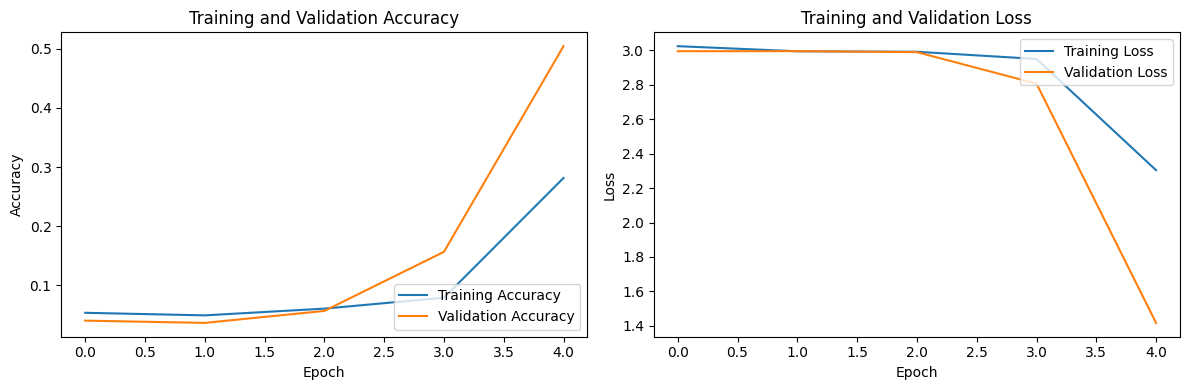

In [29]:
import matplotlib.pyplot as plt

# Memastikan bahwa history_v1.history memiliki data yang diperlukan
acc = history_v1.history.get('accuracy', [])
test_acc = history_v1.history.get('val_accuracy', [])
loss = history_v1.history.get('loss', [])
test_loss = history_v1.history.get('val_loss', [])

# Menentukan range epochs berdasarkan panjang data akurasi
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

# Plot Training and Testing Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, test_acc, label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Training and Testing Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, test_loss, label='Testing Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Mengatur layout agar rapi
plt.tight_layout()
plt.show()

In [30]:
# Evaluasi model menggunakan data uji
loss, acc = model.evaluate(X_test, y_test)

# Print hasil evaluasi
print("Loss:", loss)
print("Accuracy:", acc)

25/25 ━━━━━━━━━━━━━━━━━━━━ 124s 5s/step - accuracy: 0.4902 - loss: 1.4436
Loss: 1.4168034791946411
Accuracy: 0.5044247508049011


In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score
from sklearn import metrics


# Prediksi menggunakan model pada data uji
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Hitung dan tampilkan classification report
report = metrics.classification_report(y_true_classes, y_pred_classes, target_names=AKSARA)
print(report)

# Accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
print("Precision:", precision)

# Recall
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
print("Recall:", recall)

# F1-score
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
print("F1-score:", f1)

# Log Loss
logloss = log_loss(y_test, y_pred)
print("Log Loss:", logloss)

25/25 ━━━━━━━━━━━━━━━━━━━━ 96s 4s/step
              precision    recall  f1-score   support

          ba       0.80      0.26      0.39        47
          ca       0.60      0.31      0.41        29
          da       0.55      0.67      0.60        36
         dha       0.38      0.85      0.53        39
          ga       0.53      0.92      0.67        36
          ha       0.59      0.26      0.36        39
          ja       0.29      0.85      0.43        41
          ka       0.33      0.69      0.45        45
          la       0.73      0.92      0.81        36
          Ma       1.00      0.83      0.91        30
          na       0.00      0.00      0.00        41
         nga       0.47      0.24      0.32        38
         nya       0.41      0.74      0.53        42
          pa       1.00      0.15      0.27        52
          ra       1.00      0.52      0.68        27
          sa       0.57      0.76      0.65        41
          ta       0.31      0.23      0.2

c:\Users\wawn1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wawn1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wawn1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

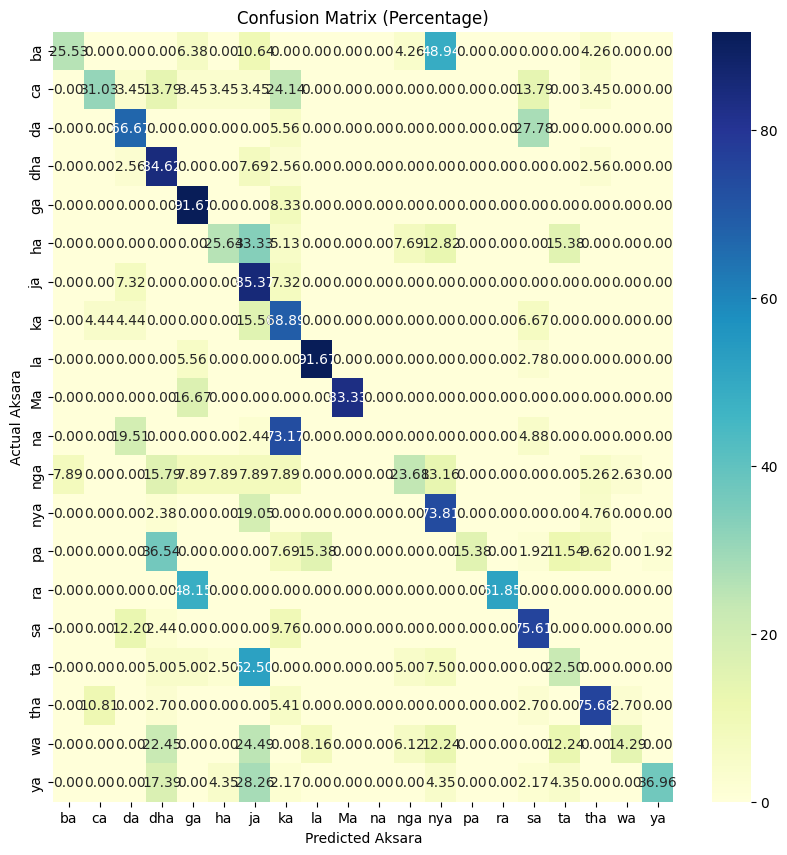

In [32]:
# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Hitung total sampel untuk setiap kelas aktual
total_per_class = np.sum(cm, axis=1)

# Konversi setiap elemen dalam confusion matrix menjadi persentase
cm_percent = (cm.astype('float') / total_per_class[:, np.newaxis]) * 100

# Display Confusion Matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=AKSARA, yticklabels=AKSARA)
plt.xlabel("Predicted Aksara")
plt.ylabel("Actual Aksara")
plt.title("Confusion Matrix (Percentage)")
plt.show()

In [33]:
# from sklearn.metrics import roc_curve, auc, roc_auc_score
# import matplotlib.pyplot as plt

# # Make predictions
# y_pred = model.predict(X_test)

# # Compute ROC curve and ROC AUC for each class
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(8):
#     fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Compute micro-average ROC curve and ROC AUC score
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
# roc_auc["micro"] = roc_auc_score(y_test, y_pred, multi_class='ovr')

# # Plot the ROC curves for each class and the micro-average ROC curve
# plt.figure(figsize=(8, 6))
# lw = 2
# plt.plot(fpr["micro"], tpr["micro"], lw=lw, label='micro-average ROC curve (AUC = {0:0.2f})'
#                                                    ''.format(roc_auc["micro"]))
# colors = ['cornflowerblue', 'darkorange', 'forestgreen', 'red', 'purple', 'gray', 'black', 'pink']
# for i, color in zip(range(8), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#              label='ROC curve of {0} (AUC = {1:0.2f})'.format(aksara_categories[i], roc_auc[i]))
    
# plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate', fontsize=14)
# plt.ylabel('True Positive Rate', fontsize=14)
# plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
# plt.legend(loc="lower right", fontsize=12)
# plt.show()

In [34]:
# from sklearn.metrics import classification_report, accuracy_score,roc_curve,confusion_matrix

# y_test_int = np.argmax(y_test, axis=1)
# y_pred = model.predict(X_test)
# y_pred_int = np.argmax(y_pred, axis=1)

# print(classification_report(y_test_int, y_pred_int))

In [35]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix

# plt.figure(figsize=(10, 10))
# cm = confusion_matrix(y_test_int, y_pred_int)

# # Hitung total sampel untuk setiap kelas aktual
# total_per_class = np.sum(cm, axis=1)

# # Konversi setiap elemen dalam confusion matrix menjadi persentase
# cm_percent = (cm.astype('float') / total_per_class[:, np.newaxis]) * 100

# # Gunakan label langsung dari variabel Aksara
# emotions_labels = aksara_categories

# sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=emotions_labels, yticklabels=emotions_labels)
# plt.xlabel("Predicted Emotions")
# plt.ylabel("Actual Emotions")
# plt.title("Confusion Matrix (Percentage)")
# plt.show()

## Model 2

In [37]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import layers, initializers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

# Initialize Sequential model
model = Sequential()

# Add VGG16 as a layer
# model.add(vgg16)

# model = models.Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=INPUT_SHAPE))
BatchNormalization()
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
BatchNormalization()
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

# Block 2
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
BatchNormalization()
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
BatchNormalization()
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

# Block 3
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
BatchNormalization()
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
BatchNormalization()
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
BatchNormalization()
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

# Block 4
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
BatchNormalization()
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
BatchNormalization()
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
BatchNormalization()
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

# Block 5
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
BatchNormalization()
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
BatchNormalization()
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
BatchNormalization()
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

# Flatten
model.add(Flatten())

# Dense layers
# model.add(Dense(512, activation='relu', kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.0001, seed=None)))
model.add(Dense(512, activation='relu'))
BatchNormalization()
model.add(Dropout(0.1))

# model.add(Dense(512, activation='relu', kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=1e-4, seed=None)))
model.add(Dense(512, activation='relu'))
BatchNormalization()
model.add(Dropout(0.1))

# Output layer
model.add(Dense(20, activation='softmax'))

In [38]:
# Adam optimizer with learning rate scheduling, Weight Decay, and Gradient Clipping
# opt = tf.keras.optimizers.Adam(learning_rate=0.0001, weight_decay=1e-4, clipvalue=0.5)
# sgd = tf.keras.optimizers.SGD(learning_rate=0.0001, weight_decay=1e-4)
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, weight_decay=1e-4)
    
# Compile the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)              │ (None, 94, 94, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 94, 94, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 47, 47, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 47, 47, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 47, 47, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 47, 47, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 23, 23, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 23, 23, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 23, 23, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 11, 11, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 5, 5, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 5, 5, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 5, 5, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     1,049,08

 Total params: 16,035,540 (61.17 MB)

 Trainable params: 16,035,540 (61.17 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
batch_size = 62
epochs = 5

history_v2 = model.fit(X_train, 
                       y_train, 
                       batch_size=batch_size, 
                       epochs=epochs, 
                       validation_data=(X_test, y_test))

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1181s 39s/step - accuracy: 0.0444 - loss: 3.0399 - val_accuracy: 0.0721 - val_loss: 2.9929
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 897s 30s/step - accuracy: 0.0806 - loss: 2.9784 - val_accuracy: 0.0898 - val_loss: 2.8817
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1155s 39s/step - accuracy: 0.1581 - loss: 2.6687 - val_accuracy: 0.5133 - val_loss: 1.5214
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 792s 26s/step - accuracy: 0.5417 - loss: 1.4541 - val_accuracy: 0.7611 - val_loss: 0.7717
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1061s 36s/step - accuracy: 0.7253 - loss: 0.8267 - val_accuracy: 0.8862 - val_loss: 0.3584


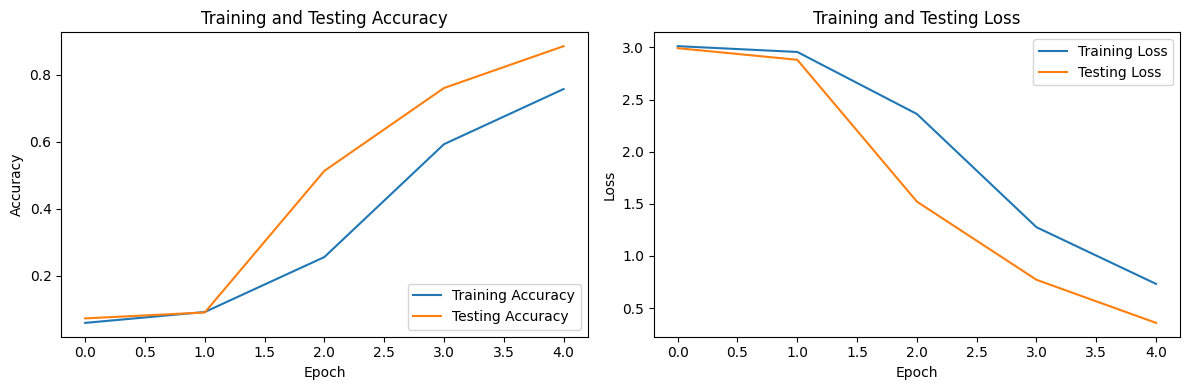

In [40]:
import matplotlib.pyplot as plt

# Memastikan bahwa history_v2.history memiliki data yang diperlukan
acc = history_v2.history.get('accuracy', [])
test_acc = history_v2.history.get('val_accuracy', [])
loss = history_v2.history.get('loss', [])
test_loss = history_v2.history.get('val_loss', [])

# Menentukan range epochs berdasarkan panjang data akurasi
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

# Plot Training and Testing Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, test_acc, label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Training and Testing Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, test_loss, label='Testing Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Mengatur layout agar rapi
plt.tight_layout()
plt.show()

In [41]:
# Evaluasi model menggunakan data uji
loss, acc = model.evaluate(X_test, y_test)

# Print hasil evaluasi
print("Loss:", loss)
print("Accuracy:", acc)

25/25 ━━━━━━━━━━━━━━━━━━━━ 162s 6s/step - accuracy: 0.8682 - loss: 0.3773
Loss: 0.35842570662498474
Accuracy: 0.8862199783325195


In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score
from sklearn import metrics


# Prediksi menggunakan model pada data uji
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Hitung dan tampilkan classification report
report = metrics.classification_report(y_true_classes, y_pred_classes, target_names=AKSARA)
print(report)

# Accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
print("Precision:", precision)

# Recall
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
print("Recall:", recall)

# F1-score
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
print("F1-score:", f1)

# Log Loss
logloss = log_loss(y_test, y_pred)
print("Log Loss:", logloss)

25/25 ━━━━━━━━━━━━━━━━━━━━ 130s 5s/step
              precision    recall  f1-score   support

          ba       0.91      0.89      0.90        47
          ca       0.92      0.83      0.87        29
          da       0.88      0.78      0.82        36
         dha       0.92      0.92      0.92        39
          ga       0.95      0.97      0.96        36
          ha       0.79      0.69      0.74        39
          ja       1.00      0.98      0.99        41
          ka       0.93      0.89      0.91        45
          la       1.00      0.92      0.96        36
          Ma       0.88      1.00      0.94        30
          na       0.76      0.93      0.84        41
         nga       0.71      0.84      0.77        38
         nya       0.95      0.88      0.91        42
          pa       0.92      0.92      0.92        52
          ra       1.00      1.00      1.00        27
          sa       1.00      0.93      0.96        41
          ta       0.78      0.78      0.

c:\Users\wawn1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


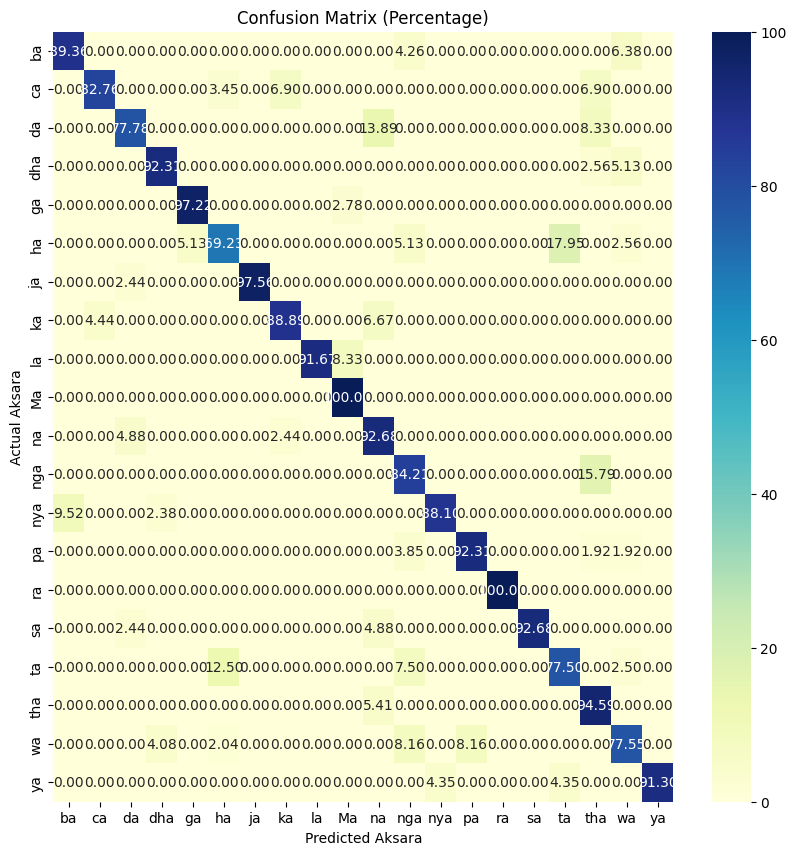

In [43]:
# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Hitung total sampel untuk setiap kelas aktual
total_per_class = np.sum(cm, axis=1)

# Konversi setiap elemen dalam confusion matrix menjadi persentase
cm_percent = (cm.astype('float') / total_per_class[:, np.newaxis]) * 100

# Display Confusion Matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=AKSARA, yticklabels=AKSARA)
plt.xlabel("Predicted Aksara")
plt.ylabel("Actual Aksara")
plt.title("Confusion Matrix (Percentage)")
plt.show()

In [44]:
# from sklearn.metrics import roc_curve, auc, roc_auc_score
# import matplotlib.pyplot as plt

# # Make predictions
# y_pred = model.predict(X_test)

# # Compute ROC curve and ROC AUC for each class
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(8):
#     fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Compute micro-average ROC curve and ROC AUC score
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
# roc_auc["micro"] = roc_auc_score(y_test, y_pred, multi_class='ovr')

# # Plot the ROC curves for each class and the micro-average ROC curve
# plt.figure(figsize=(8, 6))
# lw = 2
# plt.plot(fpr["micro"], tpr["micro"], lw=lw, label='micro-average ROC curve (AUC = {0:0.2f})'
#                                                    ''.format(roc_auc["micro"]))
# colors = ['cornflowerblue', 'darkorange', 'forestgreen', 'red', 'purple', 'gray', 'black', 'pink']
# for i, color in zip(range(8), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#              label='ROC curve of {0} (AUC = {1:0.2f})'.format(aksara_categories[i], roc_auc[i]))
    
# plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate', fontsize=14)
# plt.ylabel('True Positive Rate', fontsize=14)
# plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
# plt.legend(loc="lower right", fontsize=12)
# plt.show()

In [45]:
# from sklearn.metrics import classification_report, accuracy_score,roc_curve,confusion_matrix

# y_test_int = np.argmax(y_test, axis=1)
# y_pred = model.predict(X_test)
# y_pred_int = np.argmax(y_pred, axis=1)

# print(classification_report(y_test_int, y_pred_int))

In [46]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix

# plt.figure(figsize=(10, 10))
# cm = confusion_matrix(y_test_int, y_pred_int)

# # Hitung total sampel untuk setiap kelas aktual
# total_per_class = np.sum(cm, axis=1)

# # Konversi setiap elemen dalam confusion matrix menjadi persentase
# cm_percent = (cm.astype('float') / total_per_class[:, np.newaxis]) * 100

# # Gunakan label langsung dari variabel Aksara
# emotions_labels = aksara_categories

# sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=emotions_labels, yticklabels=emotions_labels)
# plt.xlabel("Predicted Emotions")
# plt.ylabel("Actual Emotions")
# plt.title("Confusion Matrix (Percentage)")
# plt.show()